# Python for Data Science, Final Project: Classifying Tree Cover Types

Group: Charles, Cleighton, and Carter  
July 23, 2023

[Dataset](https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset)

## Prep
### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading in the data

In [2]:
ds = pd.read_csv('/Users/chanks/workspace/forest/data/covtype.csv')

## Getting familiar with the data
Let's start by taking a look at the columns in the dataset and checking for null values.

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

We notice that there are no null values, the qualitative features (soil type and wilderness area) are already dummy columns, and cover type (the class we are trying to predict) is an integer rather than text. All good news! It might be good to make some dictionaries mapping the integers in Cover_Type to the names of each species, but we'll get to that in a bit.

The next step is to get a sense of how many observations there are for each of the cover types.

Text(0.5, 1.0, 'Distribution of Tree Cover Types')

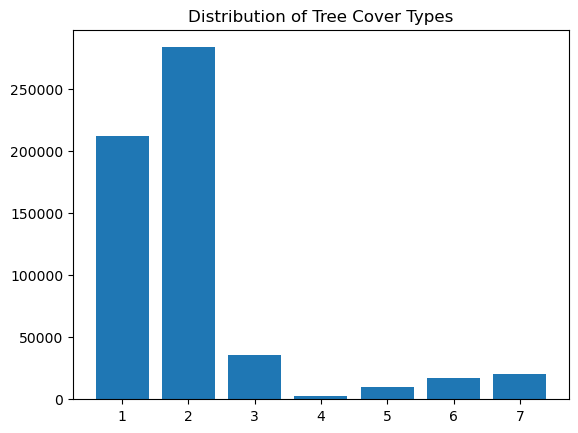

In [12]:
level_counts = ds['Cover_Type'].value_counts()

plt.bar(level_counts.index,level_counts.values)
plt.title('Distribution of Tree Cover Types')

Interesting, it looks like tree cover types 1 and 2 are pretty dominant in the dataset, while 4 is quite a small portion of the observations. It's definitely worth looking into this more later, but we should take a look at the rest of the dataset first. 

Continuing with the qualitative features, we're taking a look at how many observations there are of each soil type and wilderness area.

In [20]:
soil_types = ds.loc[:,'Soil_Type1':'Soil_Type40'].sum().sort_values()

soil_types

Soil_Type15         3
Soil_Type7        105
Soil_Type36       119
Soil_Type8        179
Soil_Type37       298
Soil_Type25       474
Soil_Type14       599
Soil_Type21       838
Soil_Type28       946
Soil_Type27      1086
Soil_Type9       1147
Soil_Type5       1597
Soil_Type34      1611
Soil_Type35      1891
Soil_Type18      1899
Soil_Type26      2589
Soil_Type16      2845
Soil_Type1       3031
Soil_Type17      3422
Soil_Type19      4021
Soil_Type3       4823
Soil_Type6       6575
Soil_Type2       7525
Soil_Type40      8750
Soil_Type20      9259
Soil_Type4      12396
Soil_Type11     12410
Soil_Type39     13806
Soil_Type38     15573
Soil_Type13     17431
Soil_Type24     21278
Soil_Type31     25666
Soil_Type12     29971
Soil_Type30     30170
Soil_Type10     32634
Soil_Type22     33373
Soil_Type33     45154
Soil_Type32     52519
Soil_Type23     57752
Soil_Type29    115247
dtype: int64

There's a serious range in terms of soil types as well! Type 15 only has three observations compared to over 115,000 observations of soil type 29.

In [27]:
wild_areas = ds.loc[:,'Wilderness_Area1':'Wilderness_Area4'].sum().sort_values()

wild_areas

Wilderness_Area2     29884
Wilderness_Area4     36968
Wilderness_Area3    253364
Wilderness_Area1    260796
dtype: int64

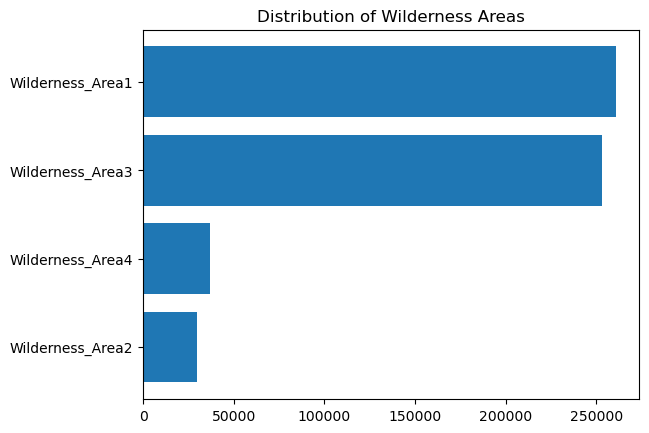

In [32]:
plt.barh(wild_areas.index, wild_areas.values)
plt.title('Distribution of Wilderness Areas')
plt.show()

Wilderness areas 1 and 3 greatly outnumber 2 and 4, but each pair is fairly close in number.  

But what about our quantitivate features? Let's take a look at how those are distributed!

In [36]:
ds.iloc[:,0:10].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


And how do those numbers compare across cover types?

In [39]:
import seaborn as sns

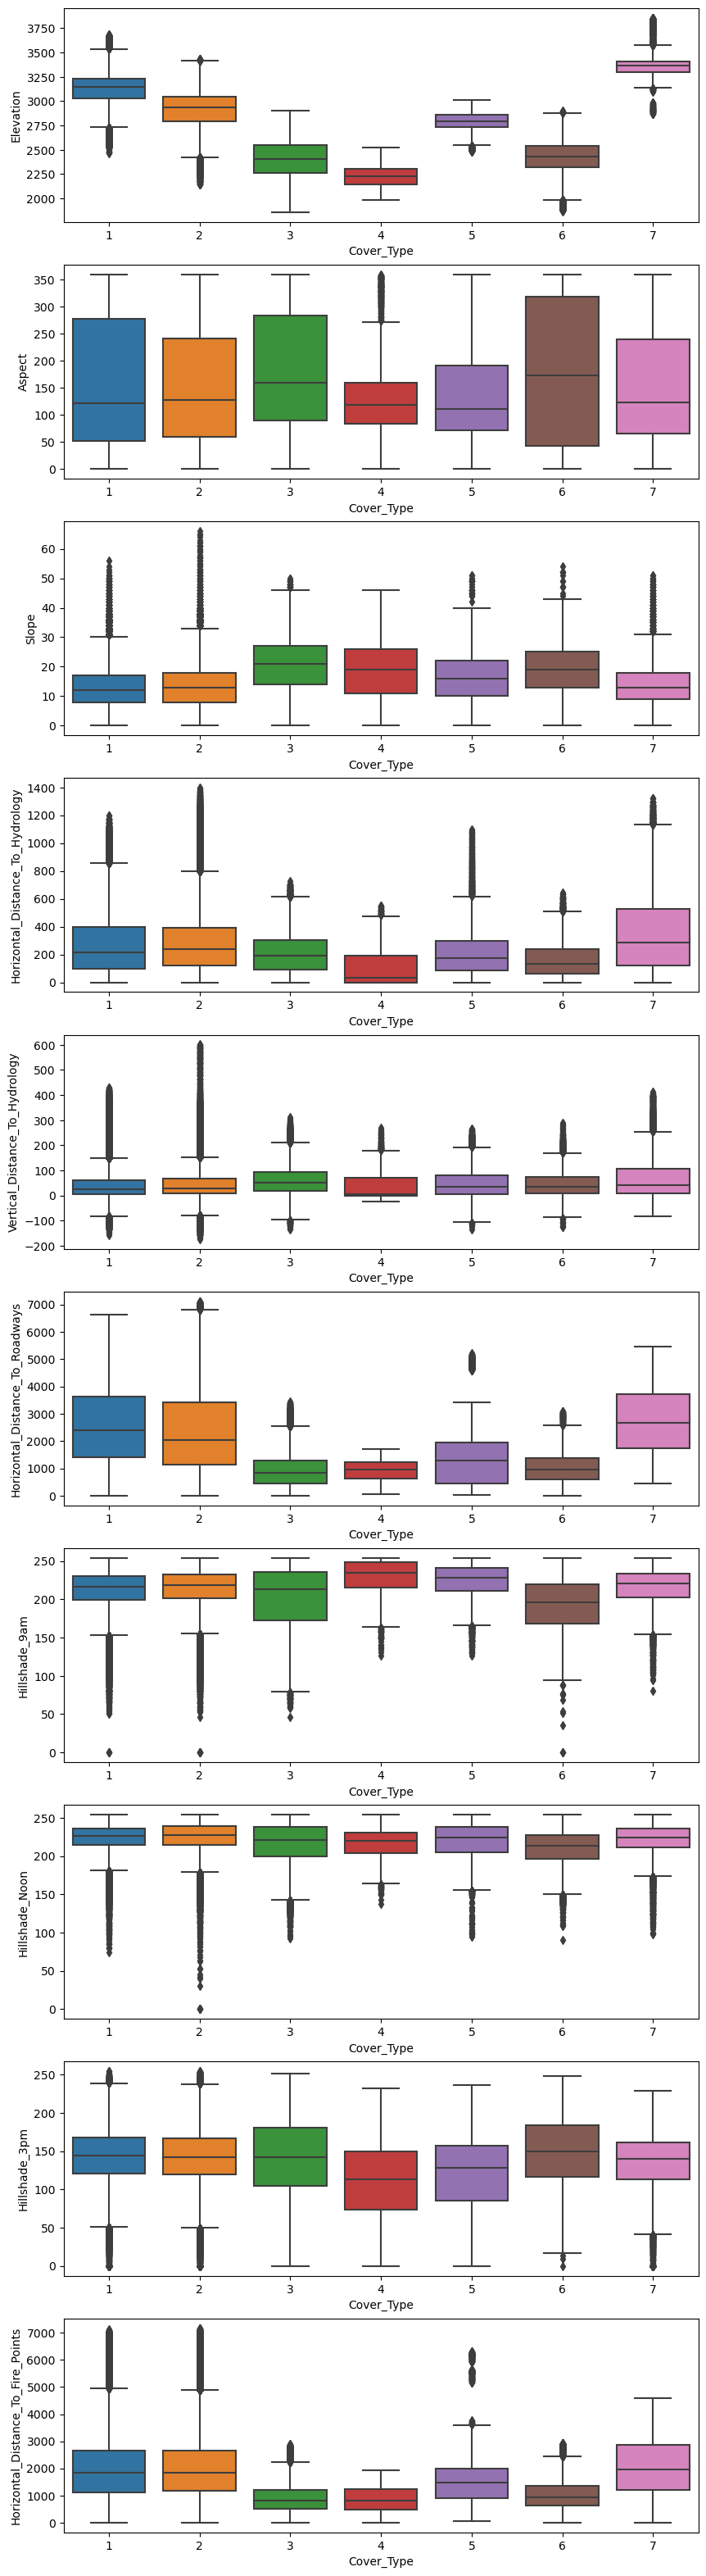

In [40]:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10,40))

for i in range(0,10):
    sns.boxplot(data=ds.iloc[:,[i,54]], x='Cover_Type', y=ds.keys()[i], ax=axes[i])

## Data Preprocessing 

In [50]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

ds.columns.get_loc('Cover_Type') # finding index of dependent variable 

features = ds.drop(ds.columns[54], axis = 1) #subsetting features 

scaled_features = pd.DataFrame(scale.fit_transform(features), columns = features.columns)

print(scaled_features)

        Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0       -1.297805 -0.935157 -1.482820                         -0.053767   
1       -1.319235 -0.890480 -1.616363                         -0.270188   
2       -0.554907 -0.148836 -0.681563                         -0.006719   
3       -0.622768 -0.005869  0.520322                         -0.129044   
4       -1.301377 -0.988770 -1.616363                         -0.547771   
...           ...       ...       ...                               ...   
581007  -2.012130 -0.023740  0.787408                         -0.867697   
581008  -2.029988 -0.032675  0.653865                         -0.952383   
581009  -2.047847  0.029873  0.386780                         -0.985317   
581010  -2.054990  0.128163  0.119694                         -0.985317   
581011  -2.058562  0.083486 -0.147392                         -0.985317   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       

In [63]:
numerical_features = ds.iloc[:,0:10]

scaled_num_features =  pd.DataFrame(scale.fit_transform(numerical_features), columns = numerical_features.columns)

print(scaled_num_features)

        Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0       -1.297805 -0.935157 -1.482820                         -0.053767   
1       -1.319235 -0.890480 -1.616363                         -0.270188   
2       -0.554907 -0.148836 -0.681563                         -0.006719   
3       -0.622768 -0.005869  0.520322                         -0.129044   
4       -1.301377 -0.988770 -1.616363                         -0.547771   
...           ...       ...       ...                               ...   
581007  -2.012130 -0.023740  0.787408                         -0.867697   
581008  -2.029988 -0.032675  0.653865                         -0.952383   
581009  -2.047847  0.029873  0.386780                         -0.985317   
581010  -2.054990  0.128163  0.119694                         -0.985317   
581011  -2.058562  0.083486 -0.147392                         -0.985317   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       

In [64]:
ds_scaled = pd.concat([scaled_num_features, ds.iloc[:,10:]], axis = 1)

ds_scaled.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,0,0,0,0,0,0,0,0,0,5
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,0,0,0,0,0,0,0,0,0,5
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,0,0,0,0,0,0,0,0,0,2
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,0,0,0,0,0,0,0,0,0,2
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,0,0,0,0,0,0,0,0,0,5


Now we have our numerical features centered and scaled, in case we use a machine learning model sensitive to numerical distances. 

## Effort Diary 

Group member: Charles
Task: Dataset research and selection (50%), Project Proposal write-up (100%)

Group member: Carter
Task: Dataset research and selection (25%), Exploratory Data Analysis of Forest dataset (100%)

Group member: Cleighton 
Task: Dataset research and selection (25%), Data preprocessing (100%)

